# Matplotlib

Matplotlib é uma biblioteca python para gráficos 2D e 3D.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# esse comando diz ao jupyter pra plotar os gráficos dentro do notebook
%matplotlib inline

# descomente a linha abaixo pra plotar os gráficos no estilo ggplot
# plt.style.use('ggplot')

# Tipos Básicos

In [0]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [0, 1, 4, 3, -1, -4, 2, -2, 7, 5]

## Gráfico de Linha

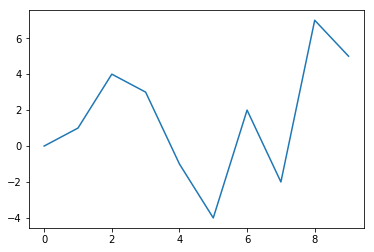

In [0]:
plt.plot(x, y)

Você pode ler mais sobre a função `plot` na <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">documentação</a>.

## Gráfico de Barra

<BarContainer object of 10 artists>

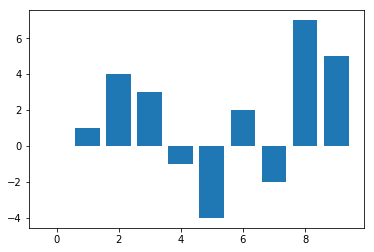

In [0]:
plt.bar(x, y)

<BarContainer object of 10 artists>

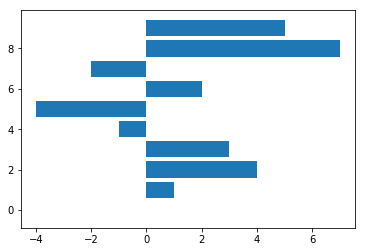

In [0]:
plt.barh(x, y)

## Gráfico de Dispersão

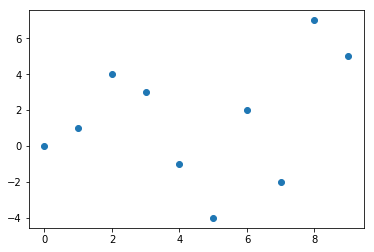

In [0]:
plt.scatter(x, y)

## Gráfico de Histograma

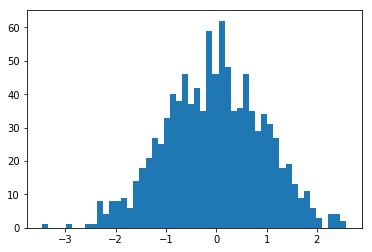

In [0]:
x = np.random.randn(1000)
plt.hist(x, bins=50)
plt.show()

# Estilos

In [0]:
x = np.linspace(0, 2, 20)
y = x ** 2

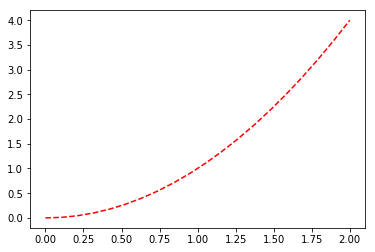

In [0]:
# plt.plot(x, y, "r--")
plt.plot(x, y, color='red', linestyle='dashed') #same as line above

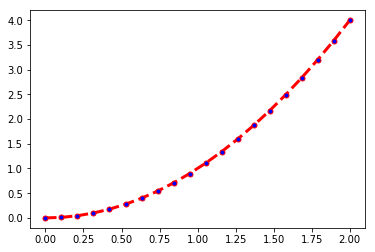

In [0]:
plt.plot(x, y, color='red', linestyle='dashed', linewidth=3, marker='o', markerfacecolor='blue', markersize=5)

# Título e Grid

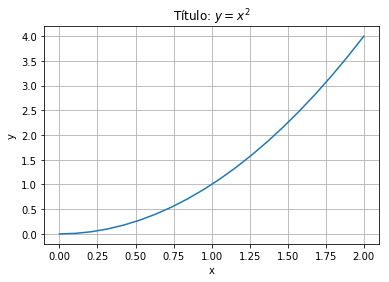

In [0]:
plt.plot(x, y)
plt.title('Título: $y=x^2$') # o title também aceita Latex Code
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Figure Size

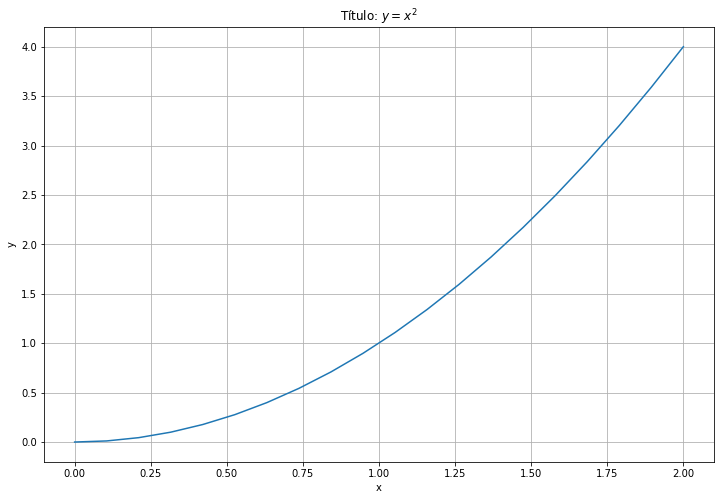

In [0]:
plt.figure(figsize=(12, 8))

plt.plot(x, y)
plt.title('Título: $y=x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Visualizando imagens

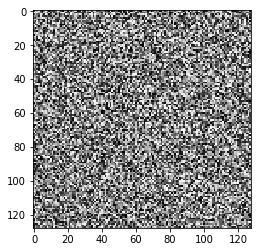

In [0]:
noise = np.random.random((128, 128)) # você pode ler suas próprias imagens com plt.imread

plt.imshow(noise, cmap='gray')

# Color Bar

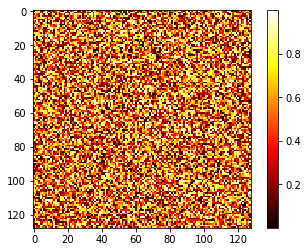

In [0]:
plt.imshow(noise, cmap=plt.cm.hot)
plt.colorbar()

# Múltiplos plots

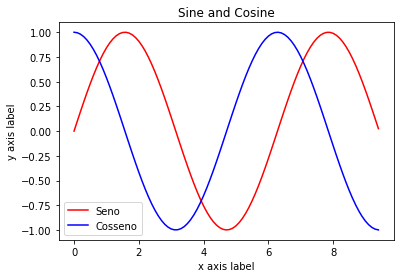

In [0]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin, color='red', label='Seno')
plt.plot(x, y_cos, color='blue', label='Cosseno')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend() # o matplotlib define automaticamente a melhor posição para as legendas

# Subplots

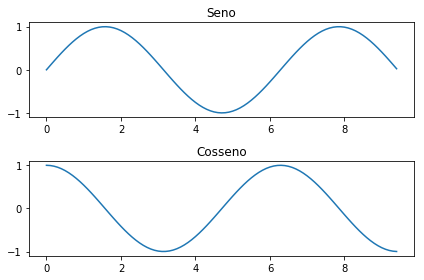

In [0]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# instancia um subplot com 2 linhas e 1 coluna
# e define o primeiro subplot como o ativo
plt.subplot(2, 1, 1)

# 1o plot
plt.plot(x, y_sin)
plt.title('Seno')

# 2o plot
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosseno')

# ajusta os gráficos na figura automaticamente (experimente rodar sem essa linha)
plt.tight_layout()

# Exercícios

> ⚠️ Em  todos os exercícios abaixo, utilizaremos os dados do DataFrame abaixo. Portanto, lembre-se de carregá-los antes de começar os exercícios

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/arnaldog12/Machine_Learning/master/data/anuncios.csv')
df

,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


**1. Plote um gráfico de barra com a qtde. de pessoas que compraram e não compraram.**

<BarContainer object of 2 artists>

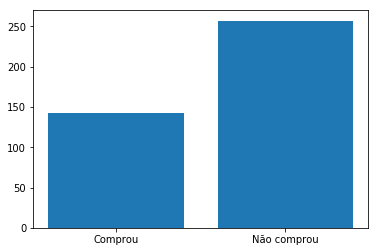

In [0]:
def muda(row):
  return "Comprou" if row["comprou"] == 1 else "Não comprou"

renomeado_df = df.copy()
renomeado_df["comprou"] = renomeado_df.apply(muda, axis=1)

grouped_people = renomeado_df.groupby('comprou').size().reset_index(name='count')
plt.bar(grouped_people['comprou'], grouped_people['count'])

**2. Plote um gráfico de dispersão $idade$ x $salario$. A cor de cada ponto deve informar se a pessoa comprou ou não.**

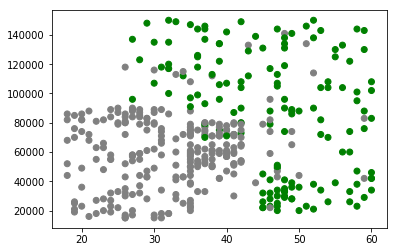

In [0]:
colors = ['green' if comprou==1 else 'gray' for comprou in df.comprou]
plt.scatter(df["idade"], df["salario"], color=colors)

**3. Plote um gráfico com dois subplots. Cada subplot deve conter o histograma de $salário$ e $idade$, respectivamente.**

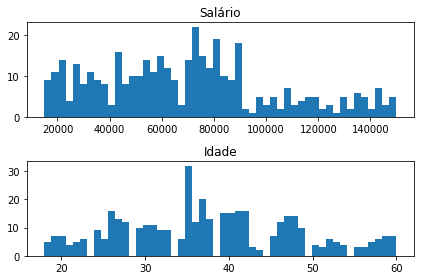

In [0]:
plt.subplot(2,1,1)
plt.hist(df["salario"], bins=50)
plt.title("Salário")

plt.subplot(2,1,2)
plt.hist(df["idade"], bins=50)
plt.title("Idade")
          
plt.tight_layout()

**4. Plot apenas um gráfico com os histogramas de salário das pessoas que compraram e não compraram. Lembre-se de plotar também as legendas.**

> Hint: use o parâmetro $alpha$ para alterar a transparência de cada gráfico.

(array([32., 20., 37., 57., 47., 52.,  1.,  5.,  3.,  3.]),
 array([ 15000.,  27600.,  40200.,  52800.,  65400.,  78000.,  90600.,
        103200., 115800., 128400., 141000.]),
 <a list of 10 Patch objects>)

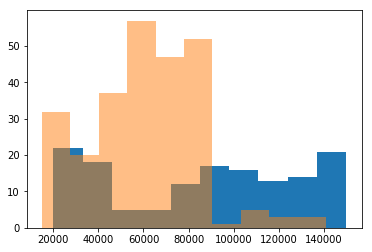

In [0]:
plt.hist(df[df['comprou'] == 1]['salario'])
plt.hist(df[df['comprou'] == 0]['salario'], alpha=0.5)

**5. Repita o exercício anterior, só que para a idade**.

(array([28., 37., 40., 27., 61., 46.,  8.,  6.,  2.,  2.]),
 array([18. , 22.1, 26.2, 30.3, 34.4, 38.5, 42.6, 46.7, 50.8, 54.9, 59. ]),
 <a list of 10 Patch objects>)

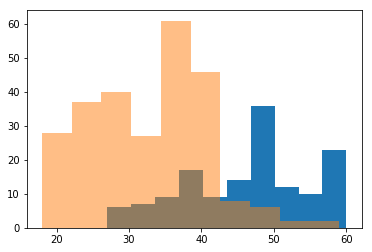

In [0]:
plt.hist(df[df['comprou'] == 1]['idade'])
plt.hist(df[df['comprou'] == 0]['idade'], alpha=0.5)

**Extra: que conclusões nós podemos tirar (ou não) dos dados de acordo com os gráficos que geramos?**

Resposta: A partir dos gráficos gerados, podemos concluir que as pessoas mais velhas tendem a receber salários maiores e com isso, compram mais que os consumidores mais novos.